### Principal component analysis
Principal component analysis is an unsupervised feature extraction algorithm that takes in m-dimensional input to create a set of n (m >> n) linearly uncorrelated variables (called principal components) in such a way that the n dimensions lose as little variance (or information) as possible due to the loss of the (m-n) dimensions.

The linear transformation in PCA is done in such a way that the first principal component holds the maximum variance (or information). It does so by considering those variables that are highly correlated to each other. Every principal component has more variance than every succeeding component and is orthogonal to the preceding component.

Consider a three-dimensional space where two features are highly correlated to each other and relatively uncorrelated to the third:

<div style="text-align:center;">
    <img src="https://lh6.googleusercontent.com/proxy/5FoHrYaHli1iqNXZunq4wg9GrHhZJFfUlRYrBLpxOXLd1R7b9a8Hkk_uukWQbLTWlvmnq07l6yypWJXBZXDbdfbq5uOrc7e32I4AdrCezl4">
</div>

Let's say that we want to convert this into a two-dimensional space. To do this, PCA tries to identify the first principal component, which will hold the maximum possible variance. It does so by defining a new dimension using the two highly correlated variables. Now, it
tries to define the next dimension in such a way that it holds the maximum variance, is orthogonal to the first principal component constructed, and also is uncorrelated to it. The two new dimensions (or principal components), PC 1 and PC 2, are shown in the preceding figure.

In [8]:
import pandas as pd
import seaborn as sns

In [3]:
# Load the Iris dataset into Pandas DataFrame
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
                   names=['sepal_length','sepal_width','petal_length','petal_width','class'])

#Display the head of the dataframe
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Import Standard Scaler from scikit-learn
from sklearn.preprocessing import StandardScaler

#Separate the features and the class
X = iris.drop('class', axis=1)
y = iris['class']

# Scale the features of X
X = pd.DataFrame(StandardScaler().fit_transform(X),
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [11]:
#Import PCA
from sklearn.decomposition import PCA

#Initialize a PCA object to transform into the 2D Space.
pca = PCA(n_components=2)

#Apply PCA
pca_iris = pca.fit_transform(X)
pca_iris = pd.DataFrame(data = pca_iris, columns = ['PC1', 'PC2'])
pca_iris.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [12]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

We see that the first principal component holds about 72.8% of the information, whereas the second principal component holds about 23.3%. In total, 95.8% of the information is retained, whereas 4.2% of the information is lost in removing two dimensions.

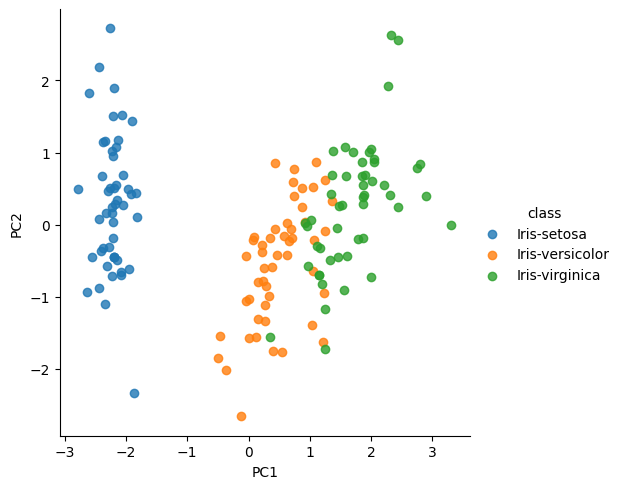

In [13]:
#Concatenate the class variable
pca_iris = pd.concat([pca_iris, y], axis = 1)

#Display the scatterplot
sns.lmplot(x='PC1', y='PC2', data=pca_iris, hue='class', fit_reg=False);

### Linear-discriminant analysis
Like PCA, linear-discriminant analysis is a linear transformation method that aims to transform m-dimensional data into an n-dimensional output space.

However, unlike PCA, which tries to retain the maximum information, LDA aims to identify a set of n features that result in the maximum separation (or discrimination) of classes. Since LDA requires labeled data in order to determine its components, it is a type of
supervised learning algorithm.

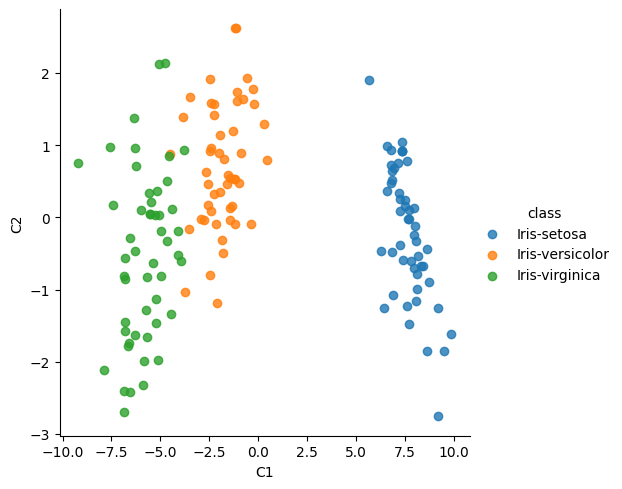

In [14]:
#Import LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Define the LDA Object to have two components
lda = LinearDiscriminantAnalysis(n_components = 2)

#Apply LDA
lda_iris = lda.fit_transform(X, y)
lda_iris = pd.DataFrame(data = lda_iris, columns = ['C1', 'C2'])

#Concatenate the class variable
lda_iris = pd.concat([lda_iris, y], axis = 1)

#Display the scatterplot
sns.lmplot(x='C1', y='C2', data=lda_iris, hue='class', fit_reg=False);

### Singular value decomposition
Singular value decomposition, or SVD, is a type of matrix analysis technique that allows us to represent a high-dimensional matrix in a lower dimension. SVD achieves this by identifying and removing the less important parts of the matrix and producing an approximation in the desired number of dimensions.

The SVD approach to collaborative filtering was first proposed by Simon Funk and proved to be extremely popular and effective during the Netflix prize competition.